**Imports**

In [87]:
# Imports:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from shapely.geometry import Polygon, LineString
import matplotlib.patches as patches


**Lengthy objects**

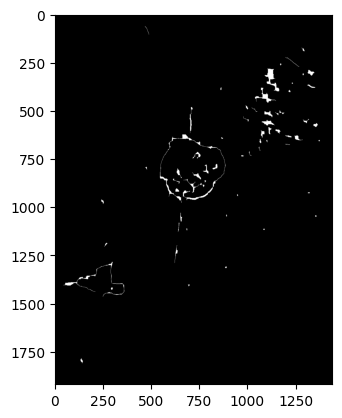

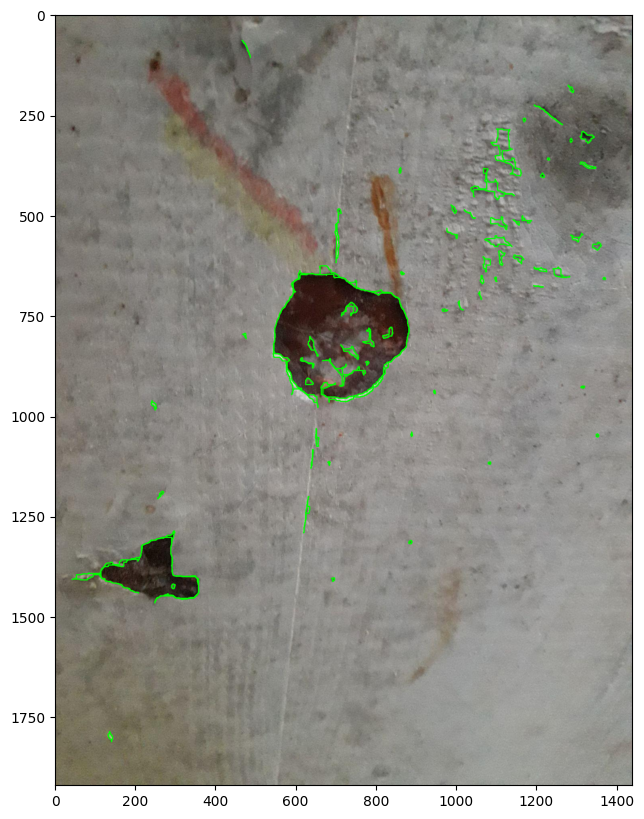

C:\Users\koeni\AppData\Local\Temp\ipykernel_44256\3209686449.py:42: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


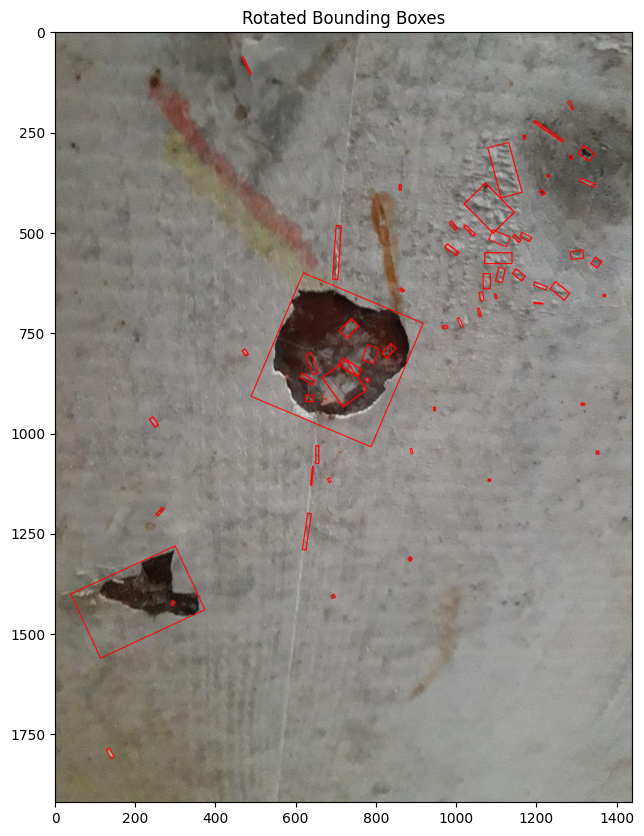

[2.7322832649590927,
 1.4230768873871835,
 1.1406249552406178,
 1.2399999367312025,
 1.6260044702331773,
 10.199187221563706,
 3.666666973869624,
 1.0,
 1.939999870382092,
 18.034484534065047,
 1.3333333333333333,
 2.8235295478235307,
 5.5,
 2.445859771061694,
 2.25,
 1.8,
 1.1875,
 1.1111110733879783,
 1.2304012186884847,
 3.3709676455895563,
 2.747239253016817,
 3.499999780410413,
 2.048077090374788,
 1.2971799849455188,
 1.951690986347308,
 2.3333333333333335,
 1.5384615810240376,
 4.38235296111296,
 4.285714512315732,
 10.749998840961842,
 1.2,
 2.5217395900571296,
 2.5999998607766206,
 1.66666661208696,
 2.0776696712377416,
 3.8606554405208473,
 1.029914500175852,
 2.111111111111111,
 1.8933334350585938,
 2.051948046016229,
 1.036363591163545,
 2.5185185185185186,
 1.5602966655597776,
 3.585271343172099,
 2.92617438735182,
 1.7992425162950723,
 2.298611143958418,
 5.885713957606883,
 10.362637335158462,
 3.000000122265935,
 1.3409091918921645,
 1.3969564947018338,
 2.8,
 4.4897959

In [71]:
# Read in image:
path = "data/dacl10k_v2_devphase/images/train/"
file = "dacl10k_v2_train_0045.jpg"
image_path = path + file
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Blur image:
gray_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply edge detector:
edges = cv2.Canny(gray_image, 50, 150)

# Apply morphological operations 
kernel = np.ones((15, 15), np.uint8)
edges = cv2.dilate(edges, kernel, iterations=1)
edges = cv2.erode(edges, kernel, iterations=1)

## Display
plt.imshow(edges, cmap='gray')
plt.show()

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(contours[0])
print(LineString(contours[0][:, 0, :]))
print("")

## Display
image_contours = image.copy()
plt.figure(figsize=(10, 10))
cv2.drawContours(image_contours, contours, -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
plt.show()

# Extract characteristics per contour:
characteristics = []
image_boxes = image.copy()

for contour in contours:

    # Get fitted bounding box
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    width = rect[1][0]
    height = rect[1][1]
    
    # Calculate aspect ratio
    aspect_ratio = float(max(width, height)) / min(width, height)
    characteristics.append(aspect_ratio)

    cv2.drawContours(image_boxes, [box], 0, (0, 0, 255), 2)


plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_boxes, cv2.COLOR_BGR2RGB))
plt.title('Rotated Bounding Boxes')
plt.show()

characteristics

**Version Samuel with visualizations**

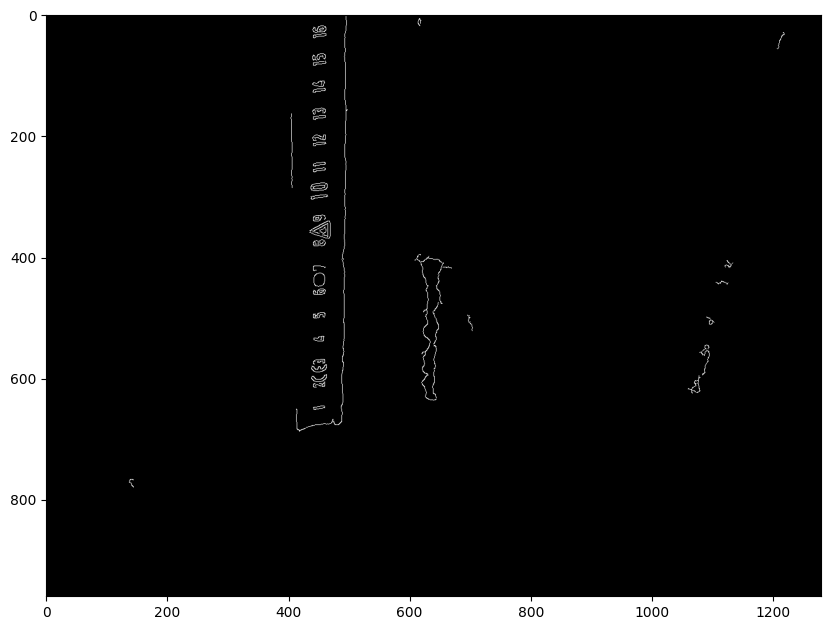

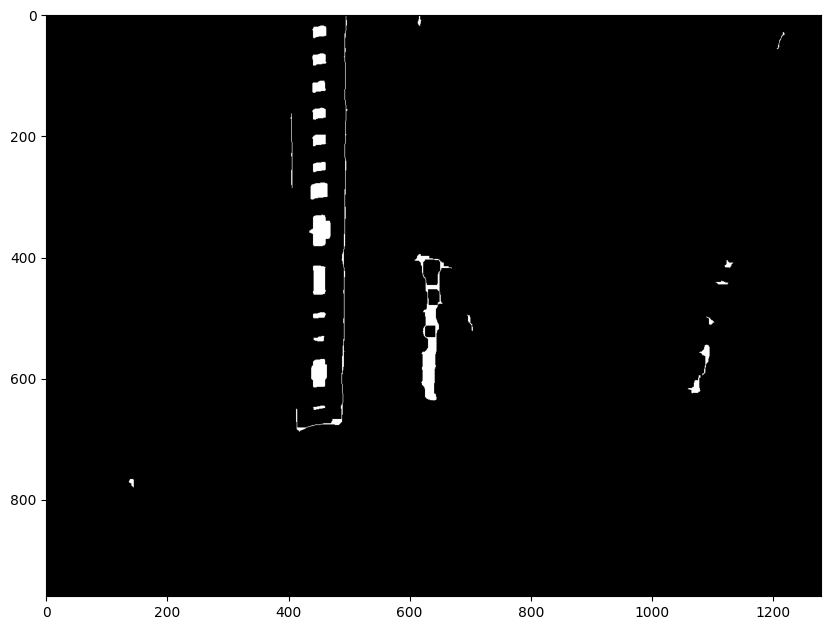

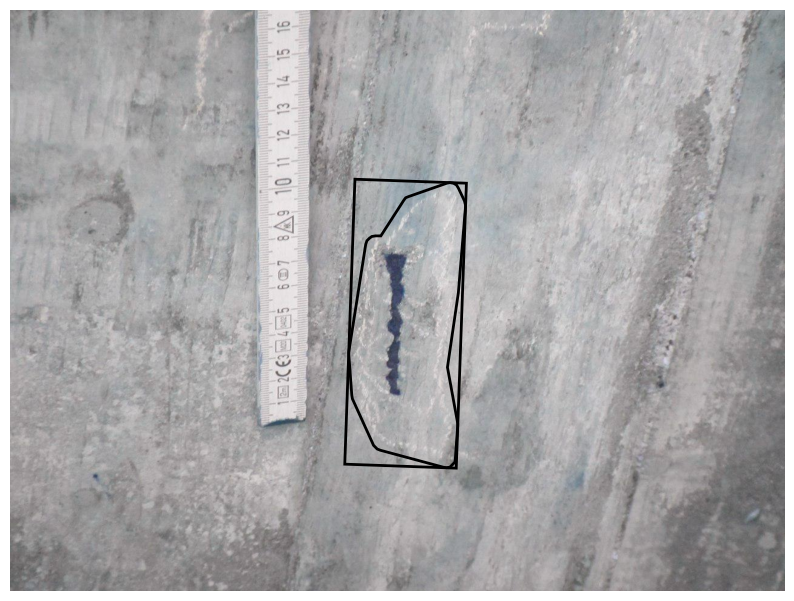

C:\Users\koeni\AppData\Local\Temp\ipykernel_44256\207642398.py:86: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


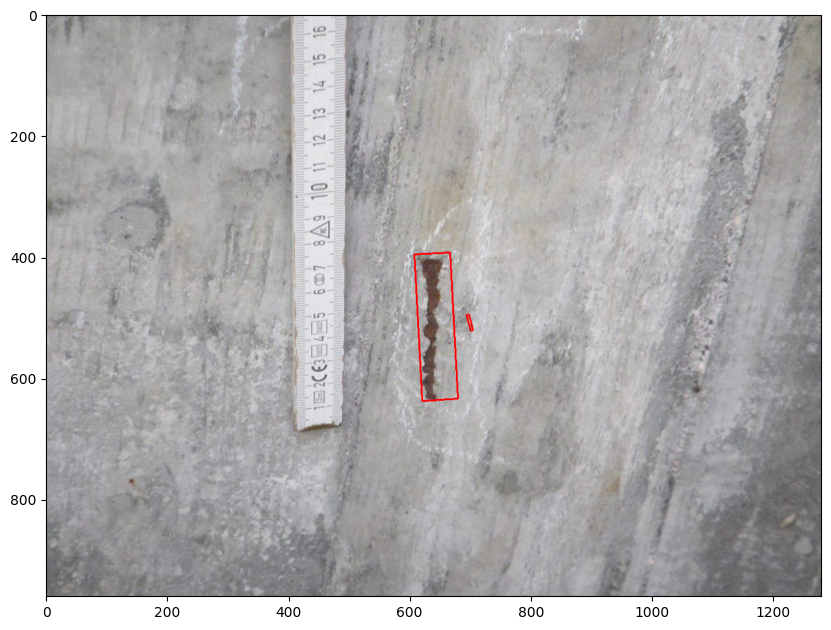

(2, 5.080673397180497, 0.5137846778052679)

In [286]:
i = i = str(297).zfill(4)

# Read in image:
image_path = f"data/dacl10k_v2_devphase/images/train/dacl10k_v2_train_{i}.jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Read in defects:
annotations_path = f"data/dacl10k_v2_devphase/annotations/train/dacl10k_v2_train_{i}.json"
with open(annotations_path, 'r') as file:
    annotations = json.load(file)
defects = annotations['shapes']

# Construct defect polygon:
defect_polygon = np.array(defects[0]['points'], dtype = np.int32)

# Function to get an image with edges for the lengthy objects filter:
def lengthy_image_filter_edges(image):
    
    # Read in image as greyscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Blur image:
    blurred_image = cv2.GaussianBlur(gray_image, (7, 7), 0)

    # Apply edge detector:
    edges = cv2.Canny(blurred_image, 50, 150)

    plt.figure(figsize=(10, 10)) # Nur zur Visualisierung -> Kann weg
    plt.imshow(edges, cmap='gray') # Nur zur Visualisierung -> Kann weg
    plt.show() # Nur zur Visualisierung -> Kann weg

    # Apply morphological operations 
    kernel = np.ones((15, 15), np.uint8)
    edges = cv2.dilate(edges, kernel, iterations=1)
    edges = cv2.erode(edges, kernel, iterations=1)

    plt.figure(figsize=(10, 10)) # Nur zur Visualisierung -> Kann weg
    plt.imshow(edges, cmap='gray') # Nur zur Visualisierung -> Kann weg
    plt.show() # Nur zur Visualisierung -> Kann weg

    return edges

# Function to get number of contours with aspect ratio > 2:
def extract_lengthy_features_1(edges, defect_polygon):

    fig, ax = plt.subplots(1, figsize=(10,10)) # Nur zur Visualisierung -> Kann weg
    ax.imshow(image) # Nur zur Visualisierung -> Kann weg
    polygon = patches.Polygon(defect_polygon, closed=True, edgecolor='black', fill=False, linewidth=2) # Nur zur Visualisierung -> Kann weg
    ax.add_patch(polygon) # Nur zur Visualisierung -> Kann weg

    # Create defect polygon and calculate its width and height:
    defect_polygon = Polygon(defect_polygon)
    defect_rect_coords = np.array(list(defect_polygon.minimum_rotated_rectangle.exterior.coords)[:-1])
    distances = [np.linalg.norm(defect_rect_coords[i] - defect_rect_coords[(i + 1) % len(defect_rect_coords)]) for i in range(len(defect_rect_coords))]
    defect_width, defect_height = sorted(distances)[0], sorted(distances)[-1]
    
    defect_rect = patches.Polygon(defect_rect_coords, closed=True, edgecolor='black', fill=False, linewidth=2) # Nur zur Visualisierung -> Kann weg
    ax.add_patch(defect_rect) # Nur zur Visualisierung -> Kann weg
    plt.axis('off') # Nur zur Visualisierung -> Kann weg
    plt.show() # Nur zur Visualisierung -> Kann weg

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Extract overlapping contours (where >80% of the contour area is overlapping with the polygon):
    overlapping_contours = []
    for contour in contours: 
        if not np.array_equal(contour[0], contour[-1]):
            contour = np.vstack([contour, contour[0:1]])
        contour_as_polygon = Polygon([(x, y) for x, y in contour[:, 0]])
        intersection = contour_as_polygon.intersection(defect_polygon)
        contour_area = contour_as_polygon.area
        intersection_area = intersection.area
        if contour_as_polygon.intersects(defect_polygon) and intersection_area >= 0.8 * contour_area:
            overlapping_contours.append(contour)

    # Extract characteristics per overlapping contour:
    characteristics = []
    lengths = []
    image_boxes = image.copy() # Nur zur Visualisierung -> Kann weg
    for contour in overlapping_contours:

        # Get fitted bounding box
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        width = max(rect[1][0], 1)
        height = max(rect[1][1], 1)
        cv2.drawContours(image_boxes, [box], 0, (0, 0, 255), 2) # Nur zur Visualisierung -> Kann weg
        
        # Calculate aspect ratio
        aspect_ratio = float(max(width, height) / min(width, height))
        characteristics.append(aspect_ratio)
        lengths.append(max(width, height))
    
    plt.figure(figsize=(10, 10)) # Nur zur Visualisierung -> Kann weg
    plt.imshow(cv2.cvtColor(image_boxes, cv2.COLOR_BGR2RGB)) # Nur zur Visualisierung -> Kann weg
    plt.show() # Nur zur Visualisierung -> Kann weg

    # Extract number of contours with aspect ratio >= 2 and the average aspect ratio of these contours:
    number = 0
    avg_aspect_ratio_lengthy = 0
    for aspect_ratio in characteristics:
        if aspect_ratio >= 2:
            avg_aspect_ratio_lengthy += aspect_ratio
            number += 1
    avg_aspect_ratio_lengthy = max(avg_aspect_ratio_lengthy / max(number, 1), 1)

    # Extract the quotient (length of the lengthiest contour) / (length of the defect):
    rel_length = (max(lengths) / max(defect_width, defect_height)) if len(lengths) > 0 else 0

    return number, avg_aspect_ratio_lengthy, rel_length

# Apply functions:
lengthy_objects_image_edges = lengthy_image_filter_edges(image)
number_lengthy_objects, avg_ar_lengthy_objects, rel_length = extract_lengthy_features_1(lengthy_objects_image_edges, defect_polygon)

number_lengthy_objects, avg_ar_lengthy_objects, rel_length




**Version Samuel without visualizations**

In [253]:
i = i = str(287).zfill(4)

# Read in image:
image_path = f"data/dacl10k_v2_devphase/images/train/dacl10k_v2_train_{i}.jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Read in defects:
annotations_path = f"data/dacl10k_v2_devphase/annotations/train/dacl10k_v2_train_{i}.json"
with open(annotations_path, 'r') as file:
    annotations = json.load(file)
defects = annotations['shapes']

# Construct defect polygon:
defect_polygon = np.array(defects[0]['points'], dtype = np.int32)

# Function to get an image with edges for the lengthy objects filter:
def lengthy_image_filter_edges(image):
    
    # Read in image as greyscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Blur image:
    blurred_image = cv2.GaussianBlur(gray_image, (7, 7), 0)

    # Apply edge detector:
    edges = cv2.Canny(blurred_image, 50, 150)

    # Apply morphological operations 
    kernel = np.ones((15, 15), np.uint8)
    edges = cv2.dilate(edges, kernel, iterations=1)
    edges = cv2.erode(edges, kernel, iterations=1)

    return edges

# Function to get number of contours with aspect ratio > 2:
def extract_lengthy_features_1(edges, defect_polygon):

    # Create defect polygon and calculate its width and height:
    defect_polygon = Polygon(defect_polygon)
    defect_rect_coords = np.array(list(defect_polygon.minimum_rotated_rectangle.exterior.coords)[:-1])
    distances = [np.linalg.norm(defect_rect_coords[i] - defect_rect_coords[(i + 1) % len(defect_rect_coords)]) for i in range(len(defect_rect_coords))]
    defect_width, defect_height = sorted(distances)[0], sorted(distances)[-1]

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Extract overlapping contours (where >80% of the contour area is overlapping with the polygon):
    overlapping_contours = []
    for contour in contours: 
        if not np.array_equal(contour[0], contour[-1]):
            contour = np.vstack([contour, contour[0:1]])
        contour_as_polygon = Polygon([(x, y) for x, y in contour[:, 0]])
        intersection = contour_as_polygon.intersection(defect_polygon)
        contour_area = contour_as_polygon.area
        intersection_area = intersection.area
        if contour_as_polygon.intersects(defect_polygon) and intersection_area >= 0.8 * contour_area:
            overlapping_contours.append(contour)

    # Extract characteristics per overlapping contour:
    characteristics = []
    lengths = []
    for contour in overlapping_contours:

        # Get fitted bounding box
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        width = max(rect[1][0], 1)
        height = max(rect[1][1], 1)
        
        # Calculate aspect ratio
        aspect_ratio = float(max(width, height) / min(width, height))
        characteristics.append(aspect_ratio)
        lengths.append(max(width, height))

    # Extract number of contours with aspect ratio >= 2 and the average aspect ratio of these contours:
    number = 0
    avg_aspect_ratio_lengthy = 0
    for aspect_ratio in characteristics:
        if aspect_ratio >= 2:
            avg_aspect_ratio_lengthy += aspect_ratio
            number += 1
    avg_aspect_ratio_lengthy = max(avg_aspect_ratio_lengthy / max(number, 1), 1)

    # Extract the quotient (length of the lengthiest contour) / (length of the defect):
    rel_length = max(lengths) / max(defect_width, defect_height)

    return number, avg_aspect_ratio_lengthy, rel_length

# Apply functions:
lengthy_objects_image_edges = lengthy_image_filter_edges(image)
number_lengthy_objects, avg_ar_lengthy_objects, rel_length = extract_lengthy_features_1(lengthy_objects_image_edges, defect_polygon)

number_lengthy_objects, avg_ar_lengthy_objects, rel_length


C:\Users\koeni\AppData\Local\Temp\ipykernel_44256\779928128.py:67: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


(1, 4.382493147222967, 1.0300332418135196)